Written by Ivan

Here I am trying to create subsets and perform SHAP analysis on them.
for example: sort out males and females and see within each subset what the deciding factors are

In [8]:
import pandas as pd
import os

# 读取完整数据
df = pd.read_csv('/Users/haoz/Desktop/cs506-project/datasets/raw_data/recruitment_data.csv')

# 创建按性别拆分的子集保存目录
output_dir = './subsets_by_gender'
os.makedirs(output_dir, exist_ok=True)

# 按 Gender 拆分并保存
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    filename = f"{output_dir}/recruitment_data_gender_{gender}.csv"
    subset.to_csv(filename, index=False)
    print(f"Saved subset for Gender={gender}: {filename}")


Saved subset for Gender=1: ./subsets_by_gender/recruitment_data_gender_1.csv
Saved subset for Gender=0: ./subsets_by_gender/recruitment_data_gender_0.csv


For females:

In [14]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/recruitment_data_gender_0.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    "Gender",
    "EducationLevel",
    "RecruitmentStrategy",
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))



[LightGBM] [Info] Number of positive: 193, number of negative: 416
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 609, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316913 -> initscore=-0.767995
[LightGBM] [Info] Start training from score -0.767995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Axes: title={'center': 'LightGBM Feature Importance (Gain)'}, xlabel='Feature importance', ylabel='Features'>

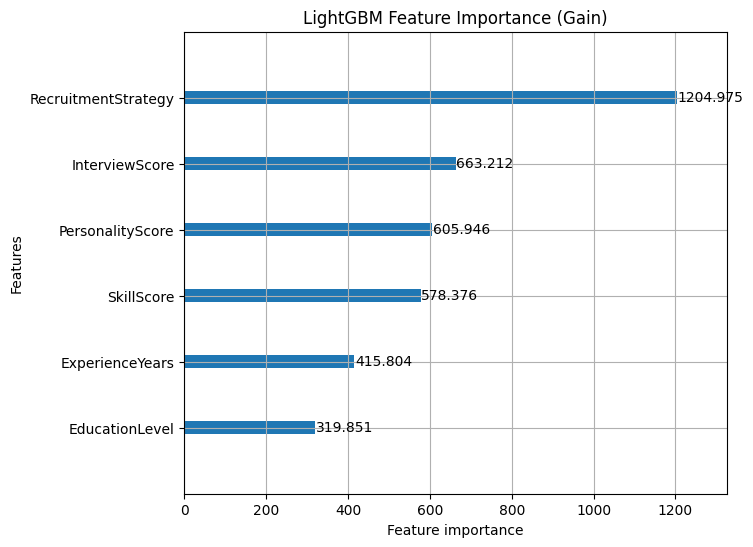

In [15]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")

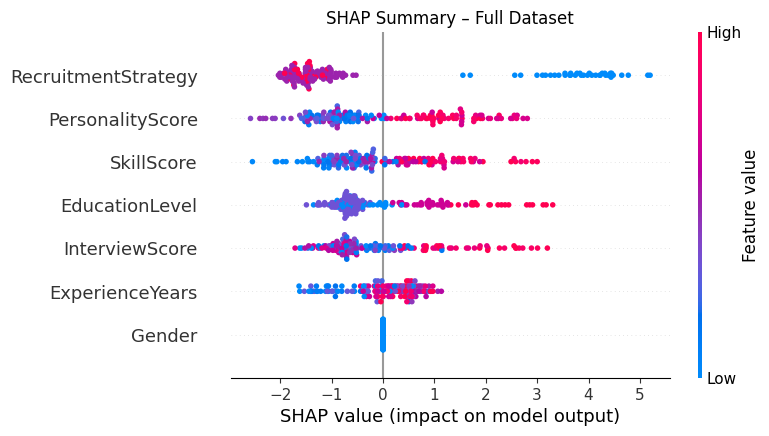

In [16]:
import shap
import matplotlib.pyplot as plt

# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – Full Dataset")
plt.show()


For males:

In [17]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/recruitment_data_gender_1.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    "Gender",
    "EducationLevel",
    "RecruitmentStrategy",
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 177, number of negative: 413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Axes: title={'center': 'LightGBM Feature Importance (Gain)'}, xlabel='Feature importance', ylabel='Features'>

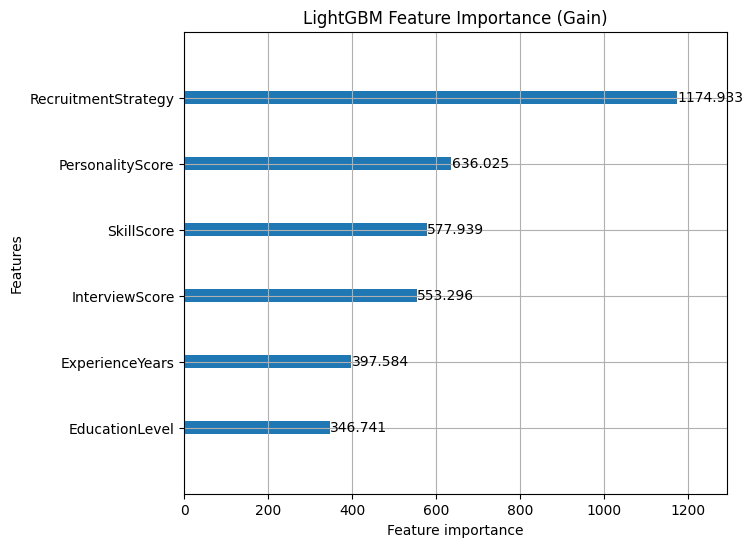

In [18]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")

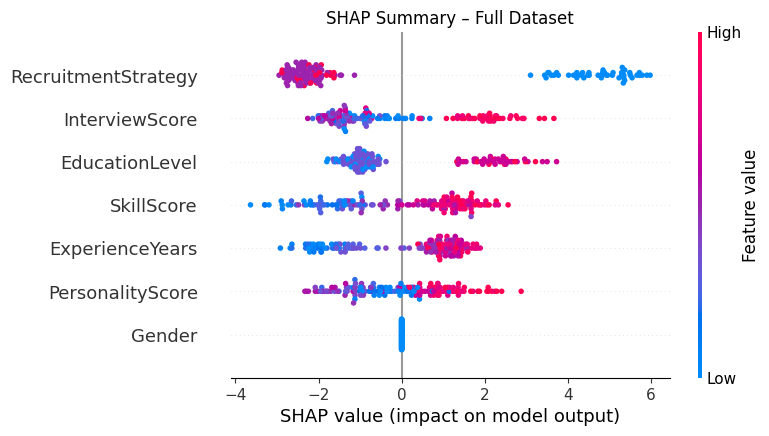

In [21]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – Full Dataset")
plt.show()
